In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vistas_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
generos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
educacion_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

## Preguntas
* **Avisos con más vistas**
* **Avisos con más postulaciones**
* **Relación vistas/postulaciones para un mismo aviso**
* **Distribución horaria de avisos y postulaciones**
* **Distribución vistas por día y género**
* **Correlación usuario-postulaciones** - analizar si un mismo usuario se postula a avisos del mismo área o no

### Veo los df

In [3]:
vistas_raw.head(1)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z


In [4]:
postulaciones_raw.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [5]:
avisos_raw.head(1)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [6]:
generos_raw.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [7]:
educacion_raw.head(1)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso


### Limpieza y/o transformaciones

In [8]:
vistas = vistas_raw

In [9]:
postulaciones = postulaciones_raw

Unifico criterios de nombres de columnas
* timestamp        -> fecha  
* fechapostulacion -> fecha

In [10]:
vistas['timestamp'] = pd.to_datetime(vistas.timestamp)

In [11]:
vistas['fecha'] = pd.to_datetime(vistas.timestamp.dt.date)
vistas['hora'] = vistas.timestamp.dt.hour
vistas['min'] = vistas.timestamp.dt.minute
vistas['seg'] = vistas.timestamp.dt.second
#vistas.rename(columns={'timestamp':'fecha'}, inplace=True)


In [12]:
vistas.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13


In [13]:
vistas.dtypes

idAviso                  int64
timestamp       datetime64[ns]
idpostulante            object
fecha           datetime64[ns]
hora                     int64
min                      int64
seg                      int64
dtype: object

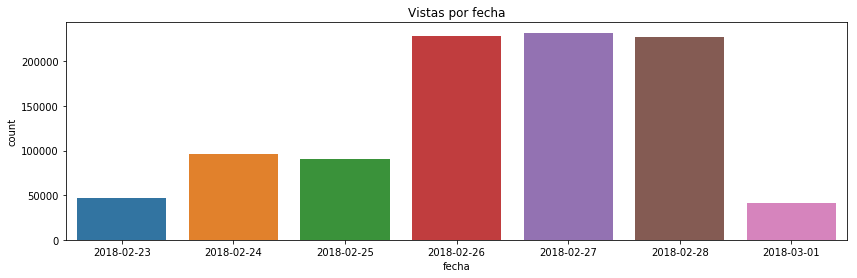

In [14]:
plt.figure(figsize=(14,4))
plt.title('Vistas por fecha')
sns.countplot(vistas.fecha.dt.date)
plt.show()

In [15]:
data = pd.merge(vistas, generos_raw, on='idpostulante')

In [16]:
data.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg,fechanacimiento,sexo
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13,1991-11-16,MASC


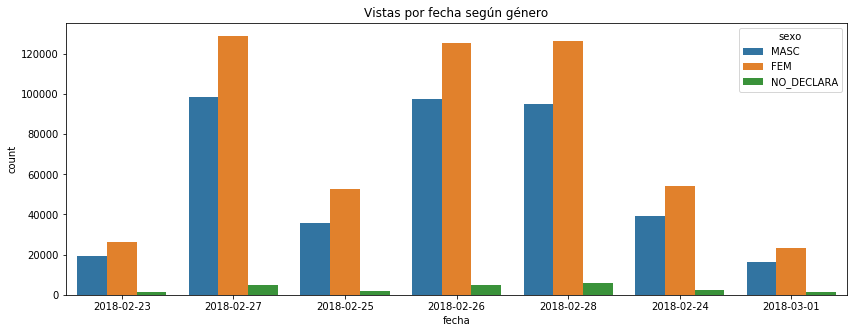

In [17]:
plt.figure(figsize=(14,5))
plt.title('Vistas por fecha según género')
sns.countplot(x=data.fecha.dt.date,hue='sexo',data=data)
plt.show()

In [18]:
#dias = ['lunes','martes','miércoles','jueve','viernes','sábado','domingo']
#plt.figure(figsize=(14,5))
#plt.title('Vistas por día de la semana según género')
#sns.countplot(data.fecha.dt.dayofweek, data=data)
#plt.xticks(data.fecha.dt.dayofweek,dias)
#plt.show()

In [19]:
postulaciones.rename(columns={'fechapostulacion':'fecha'}, inplace=True)

**vistas**

In [20]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 7 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null datetime64[ns]
idpostulante    961897 non-null object
fecha           961897 non-null datetime64[ns]
hora            961897 non-null int64
min             961897 non-null int64
seg             961897 non-null int64
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 51.4+ MB


In [21]:
vistas.head(1)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18,38,13


In [22]:
# Veo que NO faltan datos pero debo transofrmar la columna timestamp en datetime

In [23]:
vistas.fecha = pd.to_datetime(vistas.fecha)
vistas['hora'] = vistas.fecha.dt.time
vistas['fecha'] = vistas.fecha.dt.date

In [24]:
vistas.dtypes

idAviso                  int64
timestamp       datetime64[ns]
idpostulante            object
fecha                   object
hora                    object
min                      int64
seg                      int64
dtype: object

In [25]:
vistas.head(3)

,idAviso,timestamp,idpostulante,fecha,hora,min,seg
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,00:00:00,38,13
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23,00:00:00,38,14
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23,00:00:00,38,14


**postulaciones**

In [26]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso         int64
idpostulante    object
fecha           object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [27]:
postulaciones.head(1)

,idaviso,idpostulante,fecha
0,1112257047,NM5M,2018-01-15 16:22:34


In [28]:
postulaciones.fecha = pd.to_datetime(postulaciones.fecha)

In [29]:
postulaciones.dtypes

idaviso                  int64
idpostulante            object
fecha           datetime64[ns]
dtype: object

In [30]:
postulaciones.idpostulante.isna().any()

False

# Análisis

### Vistas

**Avisos con más vistas**

In [31]:
data = vistas.idAviso.value_counts().value_counts()

In [32]:
print('cant:',data.count(),'| min:',data.min(),'| max:',data.max())

cant: 815 | min: 1 | max: 1200


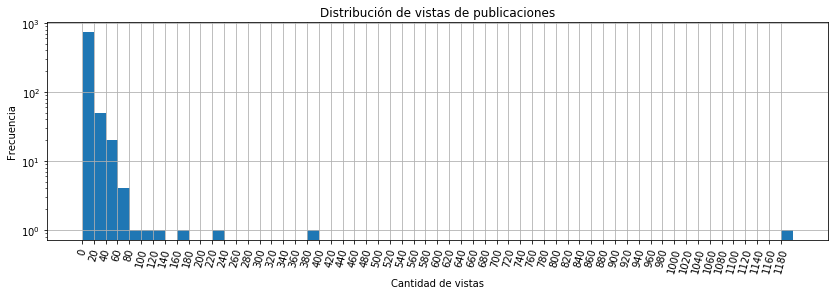

In [33]:
data.plot(kind='hist',
          bins=60, 
          logy=True,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones', 
          grid=True,
          xticks=[x for x in range(0,1200,20)],
          rot=75)
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

Puede verse como la mayor cantidad de avisos tiene menos de 20 vistas

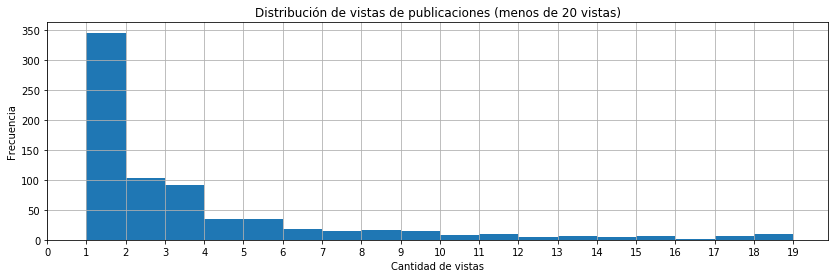

In [34]:
data[data < 20].plot(kind='hist',
          bins=18,
          figsize=(14,4), 
          title='Distribución de vistas de publicaciones (menos de 20 vistas)', 
          grid=True,
          xticks=[x for x in range(0,20)])
plt.xlabel('Cantidad de vistas')
plt.ylabel('Frecuencia')
plt.show()

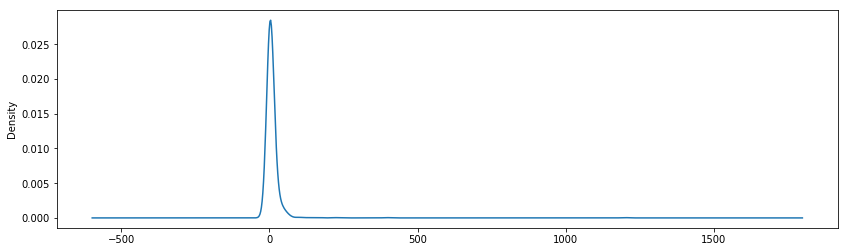

In [35]:
data.plot(kind='kde', figsize=(14,4))
plt.show()

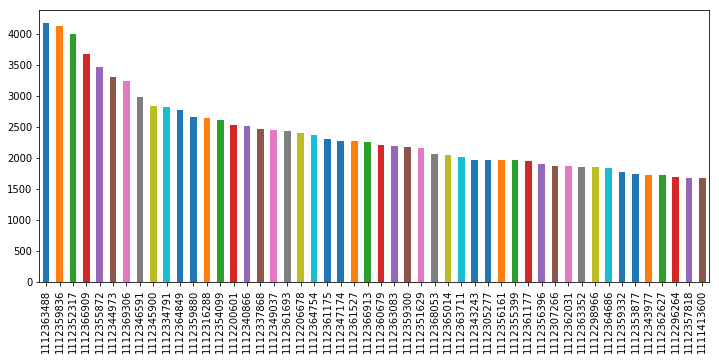

In [36]:
vistas.idAviso.value_counts().head(50).plot(kind='bar', figsize=(12,5))
plt.show()

In [37]:
data = vistas.idAviso.value_counts()

In [38]:
(data.max()-data.min())

4168

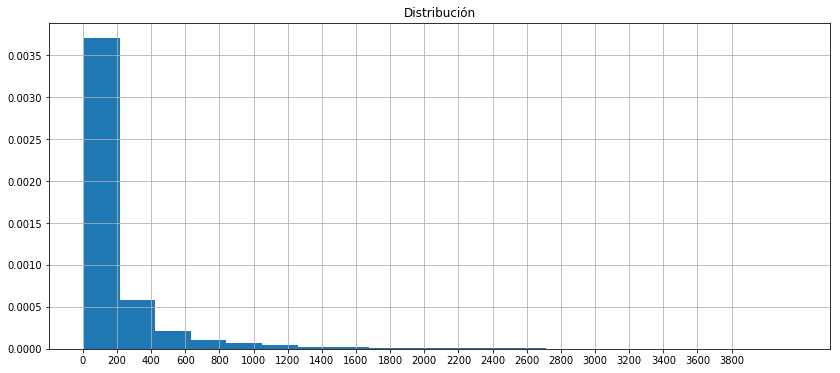

In [39]:
data = vistas.idAviso.value_counts()
plt.figure(figsize=(14,6))
plt.title('Distribución')
plt.hist(data.head(5000), bins=20, density=True)
plt.xticks([x for x in range(0,4000,200)])
plt.grid(True)
plt.show()

In [40]:
avisos = avisos_raw.rename(columns={'idaviso':'idAviso'})
avisos.head(1)

,idAviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR


In [41]:
top_vistas = vistas.idAviso.value_counts().head(10).reset_index().rename(columns={'idAviso':'count','index':'idAviso'})
top_vistas

,idAviso,count
0,1112363488,4169
1,1112359836,4120
2,1112352317,4003
3,1112366909,3669
4,1112355872,3472
5,1112344973,3299
6,1112369306,3236
7,1112346591,2979
8,1112345900,2841
9,1112334791,2817


In [42]:
data = top_vistas.merge(avisos[['idAviso','titulo','nombre_area']], on='idAviso')
data

,idAviso,count,titulo,nombre_area
0,1112363488,4169,Recepcionista para Agencia Marítima (EVENTUAL),Recepcionista
1,1112359836,4120,Cajero de Sucursal - Contrato a Plazo Fijo,Tesorería
2,1112352317,4003,Representantes de Atención al Cliente Part Tim...,Atención al Cliente
3,1112366909,3669,Representantes Telefónicos de Atención al Cliente,Ventas
4,1112355872,3472,Recepcionista/Asistente Administrativa,Recepcionista
5,1112344973,3299,Operador Telefónico Atención al Cliente - Turn...,Call Center
6,1112369306,3236,Recepcionista,Recepcionista
7,1112346591,2979,Limpieza (Puesto efectivo),Mantenimiento y Limpieza
8,1112345900,2841,Asesores de Atención al Público - Part time,Atención al Cliente
9,1112334791,2817,Cajero/a - Part Time,Comercial
